In [18]:
import sys
sys.path.insert(0, './src')
from matplotlib import pyplot as plt

from curve import *
from multiply_connected_pipe import *
from utils import *

In [19]:
orientation = -1
c = Circle(1, pt(0,0), orientation)

In [20]:
b = Boundary([c])
b.build(1e-6)
self = MultiplyConnectedPipeFromBoundaries([b])
self.build_A(fmm=False)

In [21]:
len(self.dt)

520

In [49]:
k1 = self.mat_vec.K1
k1 = k1/(self.da[np.newaxis,:])
k2 = self.mat_vec.K2
arclen = np.cumsum(np.abs(self.dt))

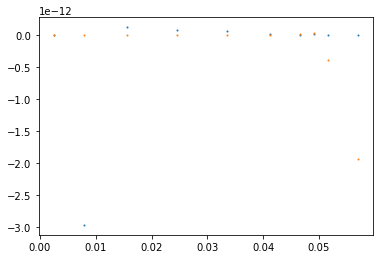

In [75]:
plt.scatter(arclen[:10],k1[0,:10]+0.5,s=1)
plt.scatter(arclen[:10],k1[0,-10:]+0.5,s=1)

In [42]:
k1_diagonal = self.k * np.abs(self.dt) / (2*np.pi)
k2_diagonal = -self.k*self.dt_da**2 * self.da / (2*np.pi*np.abs(self.dt_da))
k1_ = k1.copy()
k2_ = k2.copy()
np.fill_diagonal(k1_, - k1_diagonal)
np.fill_diagonal(k2_, - k2_diagonal)

In [10]:
p = self.panels[0]

In [11]:
pdt = p.t[:,np.newaxis] - p.t[np.newaxis,:]
p1k1 = np.imag(p.dt[np.newaxis,:]/pdt) / (-np.pi)
np.fill_diagonal(p1k1,p.k * np.abs(p.dt) / (2*np.pi))
p1arclen = np.cumsum(np.abs(p.dt))

/var/folders/tl/c_q79z3x4nx7f2p1700yhkcr0000gn/T/ipykernel_29667/4181129477.py:2: RuntimeWarning: divide by zero encountered in divide
  p1k1 = np.imag(p.dt[np.newaxis,:]/pdt) / (-np.pi)


In [12]:
p1k1_ = np.zeros_like(p1k1)
for i in range(len(p.t)):
    for j in range(len(p.t)):
        p1k1_[i,j] = np.imag(p.dt[j]/(p.t[i] - p.t[j])) / (-np.pi)
np.fill_diagonal(p1k1_,p.k * np.abs(p.dt) / (2*np.pi))

/var/folders/tl/c_q79z3x4nx7f2p1700yhkcr0000gn/T/ipykernel_29667/3249648427.py:4: RuntimeWarning: divide by zero encountered in cdouble_scalars
  p1k1_[i,j] = np.imag(p.dt[j]/(p.t[i] - p.t[j])) / (-np.pi)


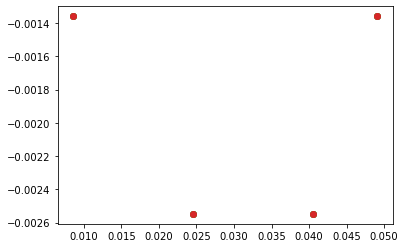

In [13]:
for i in p1k1:
    plt.scatter(p1arclen,i)


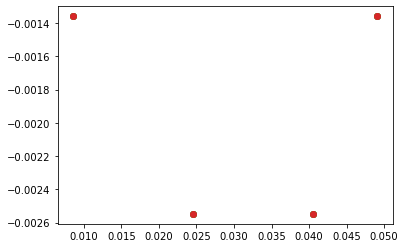

In [14]:
for i in p1k1_:
    plt.scatter(p1arclen,i)

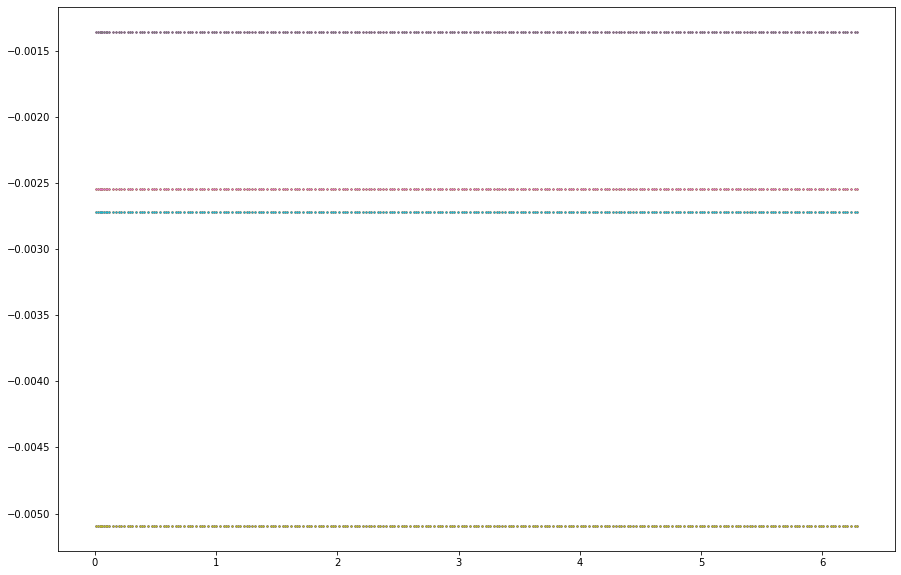

In [17]:
plt.figure(figsize=(15,10))
for m in range(20):
    plt.scatter(arclen,k1[:,m],s=1)